In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-11-17 09:27:28--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-11-17 09:27:28 (27.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

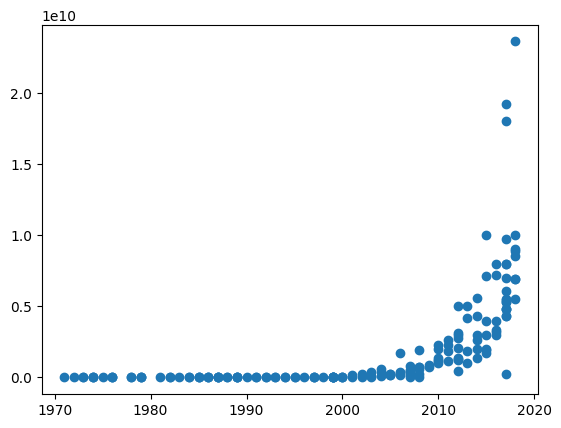

In [8]:
plt.scatter(X,Y)

In [12]:
Y = np.log(Y) #making Y linear

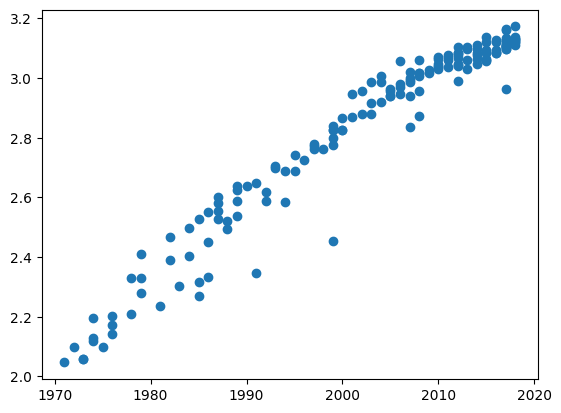

In [13]:
plt.scatter(X,Y)

In [14]:
X = X - X.mean()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss = 'mse'
)

In [19]:
def lr_schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [20]:
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 109.2106 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.9771 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.4440 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8559 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.5873 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2146 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7323 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3079 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7906 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0740 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0555 - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━━━━

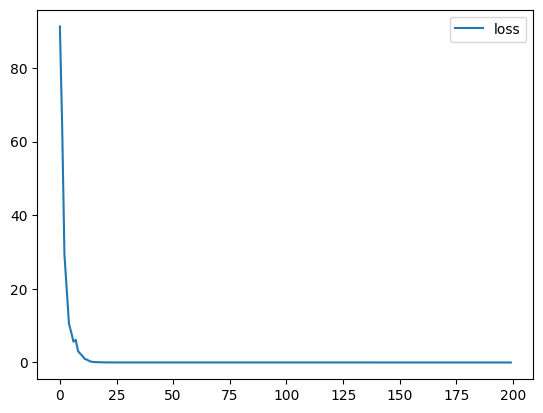

In [21]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [22]:
model.layers

[<Dense name=dense, built=True>]

In [23]:
model.layers[0].get_weights()

[array([[0.02146637]], dtype=float32), array([2.833226], dtype=float32)]

In [24]:
a = model.layers[0].get_weights()[0][0,0]

In [25]:
a

np.float32(0.021466365)

In [28]:
print("time to double: " , np.log(2)/a)

time to double:  32.28991857009374


In [30]:
X = X.flatten()
denominator = X.dot(X)-X.mean()*X.sum()
a = (X.dot(Y)-Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
print(a,b)

0.022438740069129746 2.832921808317504


In [31]:
print("time to double: " , np.log(2)/a)

time to double:  30.890646196020043
